<a href="https://colab.research.google.com/github/ameschini2206/Primera-Entrega-DSII---Alejandro-Meschini/blob/main/Primera%20Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto DATA SCIENCE II
## Primera Entrega  
### Archivo: Primera Entrega.ipynb

---
#### Variables y definición

**1. Variables de Transacción (Operativas)**

ORDERNUMBER: El identificador único de la factura. Útil para agrupaciones, pero no para predicción directa.

QUANTITYORDERED: Cantidad de unidades pedidas. Indica el volumen de la venta.
PRICEEACH: Precio unitario de cada producto en esa orden.ORDERLINENUMBER: El número de línea dentro de la misma orden (si un cliente compró varios productos distintos).

SALES: El monto total de la venta (Quantity X Price). Es la variable económica clave.

**2. Variables Temporales y de Estado**

ORDERDATE: Fecha de la venta. Crucial para analizar estacionalidad (ej. ¿se vende más en Navidad?).
DAYS_SINCE_LASTORDER: Variable de comportamiento. Indica la frecuencia de compra del cliente.
STATUS: El estado del pedido (Shipped, Cancelled, Resolved, On Hold).

**3. Variables de Producto**

PRODUCTLINE: Categoría del producto (Motorcycles, Classic Cars, etc.). Ayuda a segmentar el mercado.

MSRP: Precio de venta sugerido por el fabricante. Sirve para ver si estamos vendiendo con descuento o sobreprecio.

PRODUCTCODE: Identificador único del modelo de producto.

**4. Variables del Cliente y Geografía**

CUSTOMERNAME / CONTACT: Nombre de la empresa y la persona de contacto.

CITY / COUNTRY: Ubicación geográfica

DEALSIZE:  Tamaño del trato (Small, Medium, Large).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url_proyecto:str = r'https://raw.githubusercontent.com/ameschini2206/Primera-Entrega-DSII---Alejandro-Meschini/refs/heads/main/Auto%20Sales%20data.csv'
df = pd.read_csv(url_proyecto)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

/tmp/ipython-input-723654638.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PRODUCTLINE', data=df, palette='viridis')


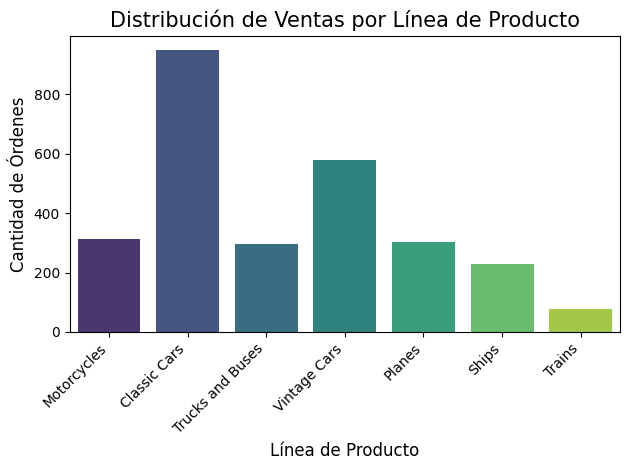

<Figure size 1600x800 with 0 Axes>

In [22]:
sns.countplot(x='PRODUCTLINE', data=df, palette='viridis')
plt.title('Distribución de Ventas por Línea de Producto', fontsize=15)
plt.xlabel('Línea de Producto', fontsize=12)
plt.ylabel('Cantidad de Órdenes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.figure(figsize=(16, 8))
plt.show()